In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

import matplotlib.animation as animation

In [2]:
from manim import *

class Einstein(Scene):
    def construct(self):
        t = Tex(r"$E=mc^2$", font_size = 96)
        self.play(Write(t))
        self.wait()

ModuleNotFoundError: No module named 'manim'

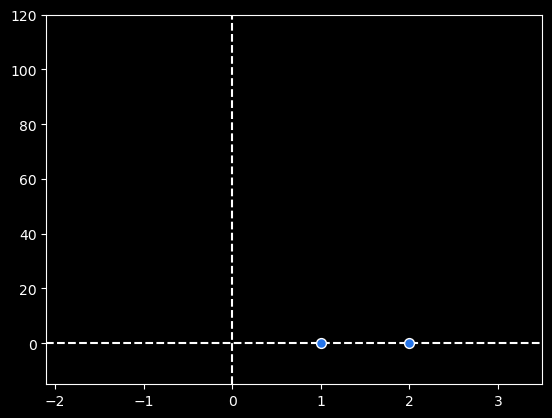

In [37]:
plt.style.use('dark_background')

fig, ax = plt.subplots()

X = np.arange(-2.5,6,0.1)
Y = x**5 - 2*x**4 + 3*x**3 + 5*x**2 - 37*x + 30

ax.axhline(y=0, linestyle='--', c='w')
ax.axvline(x=0, linestyle='--', c='w')
ax.set_xlim(-2.1,3.5)
ax.set_ylim(-15,120)





scat = ax.scatter([], [], c="#2574e8", edgecolor='w', s=50, zorder=2)
line = ax.plot(X[0], Y[0], c='w', label=r'$y = 1x^5 - 2x^4 +3x^3 +5x^2 - 37x + 30$', zorder=1)[0]
#ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = X[:frame]
    y = Y[:frame]
    # update the scatter plot:
    #data = np.stack([x, y]).T
    #scat.set_offsets(data)
    # update the line plot:
    line.set_xdata(X[:frame])
    line.set_ydata(Y[:frame])

    if frame == len(X):
        scat.set_offsets([[1,0],[2,0]])

    return (line)

fps=30
anim = animation.FuncAnimation(fig=fig, func=update, frames=90, interval=30)
anim.save("3rd-deg-polynomial-syndromes.mp4",fps=fps,writer='ffmpeg')
#plt.show()

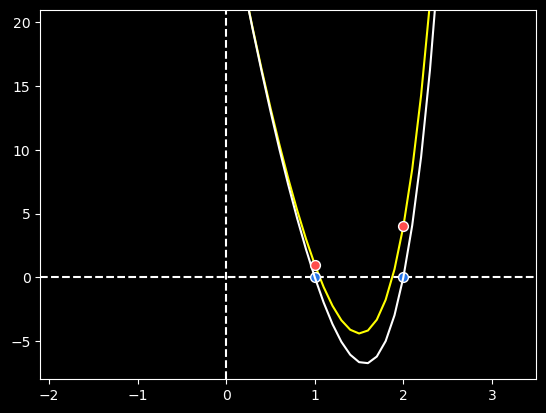

In [72]:
plt.style.use('dark_background')

fig, ax = plt.subplots()


X = np.arange(-2.5,6,0.1)
Y = x**5 - 2*x**4 + 3*x**3 + 5*x**2 - 37*x + 30

Xerr = X
Yerr = x**5 - 2*x**4 + 3*x**3 + 6*x**2 - 37*x + 30

ax.axhline(y=0, linestyle='--', c='w')
ax.axvline(x=0, linestyle='--', c='w')
ax.scatter([1,2],[0,0], c="#2574e8", edgecolor='w', s=50, zorder=2)
ax.set_xlim(-2.1,3.5)
ax.set_ylim(-15,120)
ax.plot(X, Y, c='w')

textvar = fig.text(0.5,0.5,"[1, -2, 3, 6, -37, 30]", c='r', fontsize=15)


scat = ax.scatter([], [], c="#ff4d4d", edgecolor='w', s=50, zorder=2)
line = ax.plot(Xerr[0], Yerr[0], c='yellow', label=r'$y = 1x^5 - 2x^4 +3x^3 +5x^2 - 37x + 30$', zorder=1)[0]

def update(frame):
    # for each frame, update the data stored on each artist.
    x = Xerr[:frame]
    y = Yerr[:frame]
    # update the scatter plot:
    #data = np.stack([x, y]).T
    #scat.set_offsets(data)
    # update the line plot:
    line.set_xdata(Xerr[:frame])
    line.set_ydata(Yerr[:frame])



    if frame == len(X):
        scat.set_offsets([[1,1],[2,4]])

    if frame > len(X):
        ax.set_ylim(-8,140-frame)

        for txt in fig.texts:
            txt.set_visible(False)

    return (line)

fps=30
anim = animation.FuncAnimation(fig=fig, func=update, frames=120, interval=30)
anim.save("3rd-deg-polynomial-syndromes_error.mp4",fps=fps,writer='ffmpeg')

plt.show()

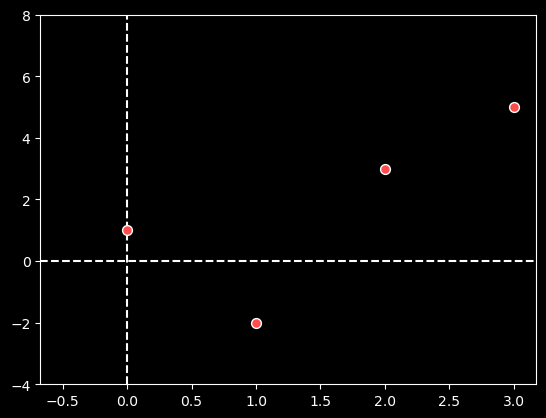

In [46]:
plt.style.use('dark_background')

fig, ax = plt.subplots()

message = [1, -2, 3, 5]

X = np.arange(0,4,1)
Y = np.array(message)

poly = lagrange(X,Y)
X_poly = np.arange(-0.5,4,0.1)
Y_poly = Polynomial(poly.coef[::-1])(X_poly)
#plt.plot(X_poly, Y_poly, label='Lagrange Polynomial')
#plt.scatter(x, y, c='red', label="message points")




ax.axhline(y=0, linestyle='--', c='w')
ax.axvline(x=0, linestyle='--', c='w')
ax.set_ylim(-4,8)




scat = ax.scatter(X, Y, c="#ff4d4d", edgecolor='w', s=50, zorder=2)
line = ax.plot(X_poly[0], Y_poly[0], c='w', label=r'$y = 1x^5 - 2x^4 +3x^3 +5x^2 - 37x + 30$', zorder=1)[0]
#ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = X_poly[:frame]
    y = Y_poly[:frame]
    # update the scatter plot:
    # data = np.stack([x, y]).T
    # scat.set_offsets(data)
    # update the line plot:
    line.set_xdata(X_poly[:frame])
    line.set_ydata(Y_poly[:frame])

    return (line)

fps=30
anim = animation.FuncAnimation(fig=fig, func=update, frames=90, interval=30)
anim.save("lagrange_polynomial.mp4",fps=fps,writer='ffmpeg')
#plt.show()

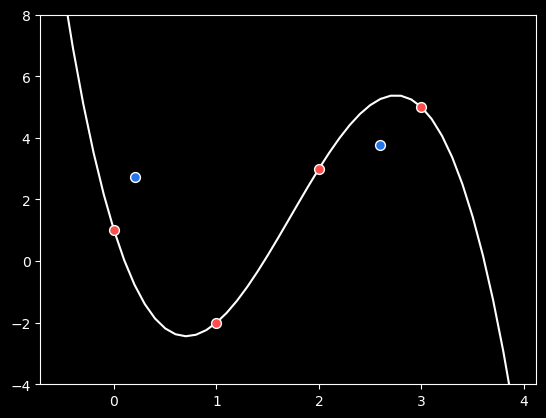

In [53]:
plt.style.use('dark_background')

fig, ax = plt.subplots()

message = [1, -2, 3, 5]

X = np.arange(0,4,1)
Y = np.array(message)

poly = lagrange(X,Y)
X_poly = np.arange(-0.5,4,0.1)
Y_poly = Polynomial(poly.coef[::-1])(X_poly)
plt.plot(X_poly, Y_poly, c='w', label='Lagrange Polynomial')
plt.scatter(X, Y, c="#ff4d4d", edgecolor='w', s=50, zorder=2)
plt.ylim(-4,8)

# set up error points:

x2 = np.array([0.2, 2.6])
y2 = Polynomial(poly.coef[::-1])(x2)
y2[0] += 3.5
y2[1] -= 1.5

x_err = np.concatenate((X, x2), axis=0)
y_err = np.concatenate((Y, y2), axis=0)
poly_err = lagrange(x_err, y_err)

x_polyerr = np.arange(-0.5,4,0.1)
y_polyerr = Polynomial(poly_err.coef[::-1])(x_polyerr)


scat = ax.scatter([], [], c="#2574e8", edgecolor='w', s=50, zorder=2)
line = ax.plot(x_polyerr[0], y_polyerr[0], c='w', label=r'$y = 1x^5 - 2x^4 +3x^3 +5x^2 - 37x + 30$', zorder=1, linestyle='--')[0]
#ax.legend()


def update(frame):

    if frame == 8:
        data = np.stack([x2, y2]).T
        scat.set_offsets(data) 

    # update the line plot:
    line.set_xdata(x_polyerr[:frame])
    line.set_ydata(y_polyerr[:frame])

    return (scat,line)

fps=30
anim = animation.FuncAnimation(fig=fig, func=update, frames=90, interval=30)
anim.save("lagrange_polynomial_5D_err.mp4",fps=fps,writer='ffmpeg')
#plt.show()